In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Rahul\Desktop\Tradexa\games\games.csv', header = 0)

### General trends of ‘White’ players WRT ‘Black’ players

In [5]:
import plotly.graph_objects as go

# Calculate the count of winners (white and black)
winner_counts = df['winner'].value_counts()

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=winner_counts.index, values=winner_counts, hole=0.2)])

# Show the plot
fig.show()

##### Pie Chart to show Black, White & draw percentage over winner attribute

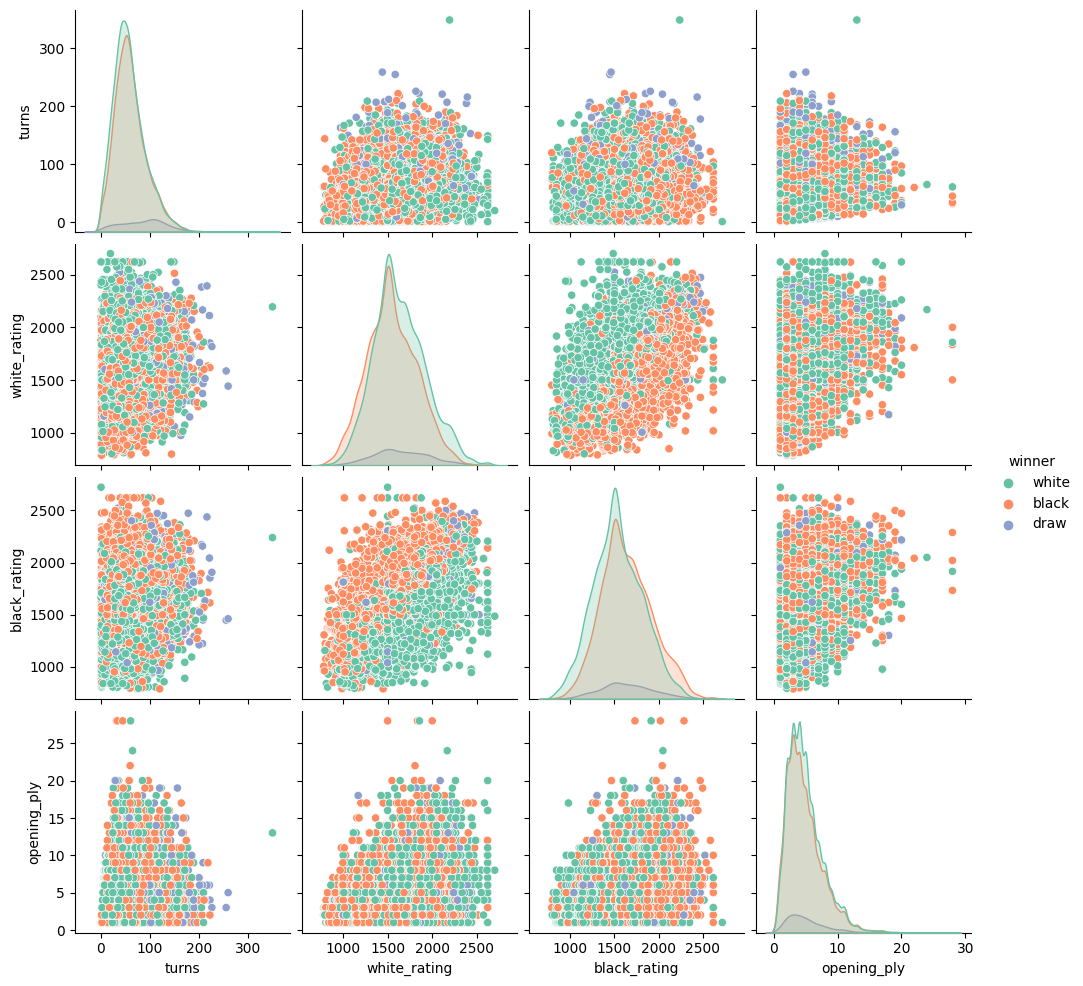

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant columns for correlation analysis
chess_corr = df[['turns', 'white_rating', 'black_rating', 'opening_ply', 'winner', 'victory_status']]

# Plot pairwise relationships in the dataset
# Pair plot allows us to visualize the relationship between different pairs of variables
# Hue parameter is set to 'winner' to color the data points based on the winner of the game
# Kind parameter is set to 'scatter' to create scatter plots
# Palette parameter is set to 'Set2' to define the color palette for the plot
sns.pairplot(chess_corr, hue='winner', kind='scatter', palette='Set2')

# Display the plot
plt.show()

##### Winner shows green dots for white, orange dots with black and blue dots for draw for turns, white_rating, black_rating and opening_ply

In [6]:
# Created game_duration attributes 
df['game_duration'] = df.last_move_at - df.created_at

In [7]:
# 1. Winning Percentage
white_wins = df[df['winner'] == 'white']
black_wins = df[df['winner'] == 'black']
total_games = len(df)
white_win_percentage = len(white_wins) / total_games * 100
black_win_percentage = len(black_wins) / total_games * 100

print("White win percentage:", white_win_percentage)
print("Black win percentage:", black_win_percentage)

# 2. Average Game Duration
white_avg_duration = white_wins['game_duration'].mean()
black_avg_duration = black_wins['game_duration'].mean()

print("Average game duration for White players:", white_avg_duration)
print("Average game duration for Black players:", black_avg_duration)


White win percentage: 49.86040482600458
Black win percentage: 45.403330342008175
Average game duration for White players: 851295.4430556945
Average game duration for Black players: 834751.4593170088


##### Count plot of wins by black , white and draw

<Axes: xlabel='winner', ylabel='count'>

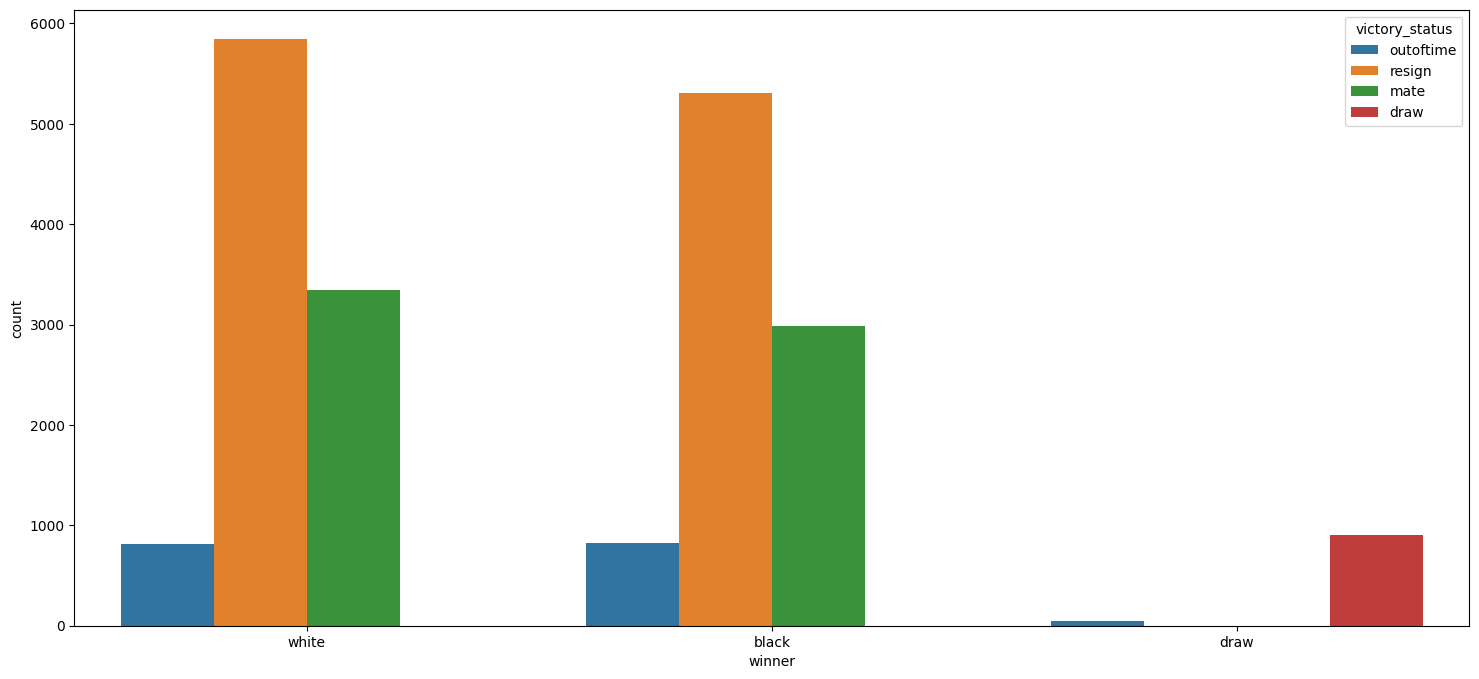

In [11]:
plt.figure(1,figsize=(18,8))
sns.countplot(x='winner',data=df,hue='victory_status')


### - Any trend of winners WRT to turns and match time

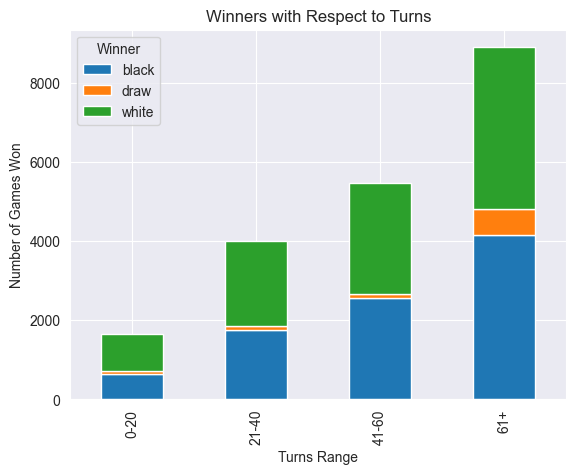

In [24]:


# Create bins for different ranges of turns
bins = [0, 20, 40, 60, float('inf')] 

# Create labels for the bins
labels = ['0-20', '21-40', '41-60', '61+']

# Add a new column 'Turns Range' to the DataFrame indicating the range of turns
df['turns Range'] = pd.cut(df['turns'], bins=bins, labels=labels, right=False)

# Group the data by turn ranges and winner, then count the number of games won by each player
winners_by_turns = df.groupby(['turns Range', 'winner']).size().unstack(fill_value=0)

# Visualize the distribution of winners using a bar plot
winners_by_turns.plot(kind='bar', stacked=True)
plt.xlabel('Turns Range')
plt.ylabel('Number of Games Won')
plt.title('Winners with Respect to Turns')
plt.legend(title='Winner')
plt.show()


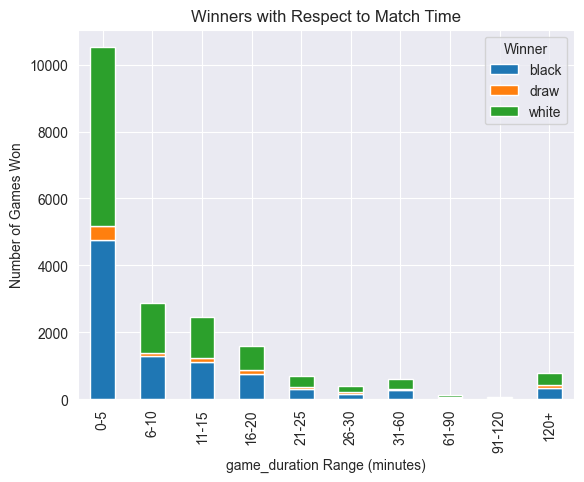

In [26]:

# Convert timestamp columns to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms')

# Calculate the time difference in minutes
df['game_duration'] = (df['last_move_at'] - df['created_at']).dt.total_seconds() / 60



# Create bins for different time controls
# Adjust the bins as per your dataset
time_bins = [0, 5, 10, 15, 20, 25, 30, 60, 90, 120, float('inf')]
time_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-60', '61-90', '91-120', '120+']

# Add a new column 'Time Control Range' to the DataFrame indicating the range of time controls
df['game_duration Range'] = pd.cut(df['game_duration'], bins=time_bins, labels=time_labels, right=False)

# Group the data by time control range and winner, then count the number of games won by each player
winners_by_time = df.groupby(['game_duration Range', 'winner']).size().unstack(fill_value=0)

# Visualize the distribution of winners using a bar plot
winners_by_time.plot(kind='bar', stacked=True)
plt.xlabel('game_duration Range (minutes)')
plt.ylabel('Number of Games Won')
plt.title('Winners with Respect to Match Time')
plt.legend(title='Winner')
plt.show()


### Opening Name and Rank

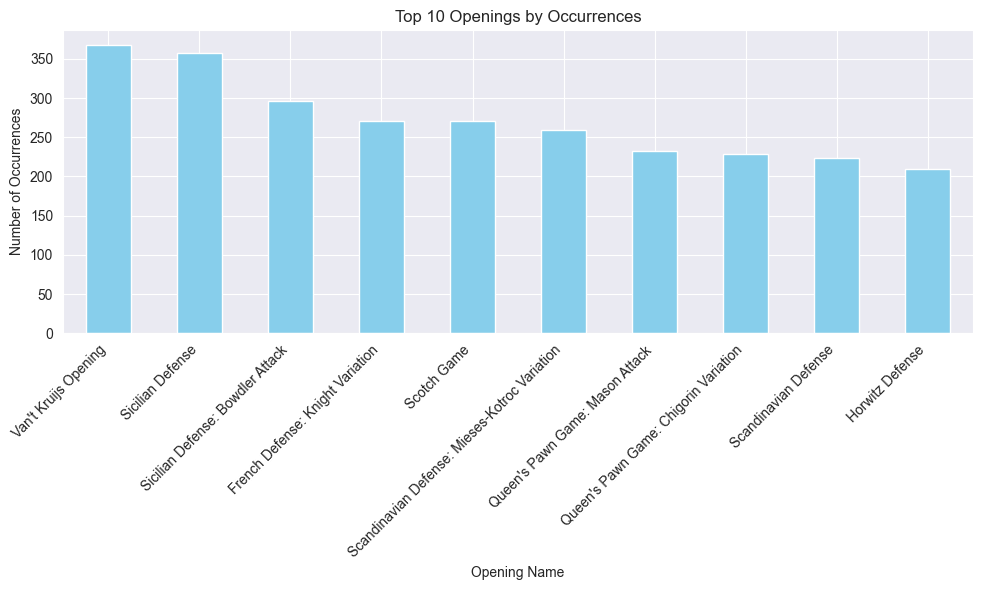

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort DataFrame by white_id and white_rating in descending order
sorted_df = df.sort_values(by=['white_id', 'white_rating'], ascending=[False, False])

# Group by opening_name and count occurrences
opening_counts = sorted_df['opening_name'].value_counts()

# Get the top 10 openings
top_openings = opening_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_openings.plot(kind='bar', color='skyblue')
plt.title('Top 10 Openings by Occurrences')
plt.xlabel('Opening Name')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Opening Name and Color

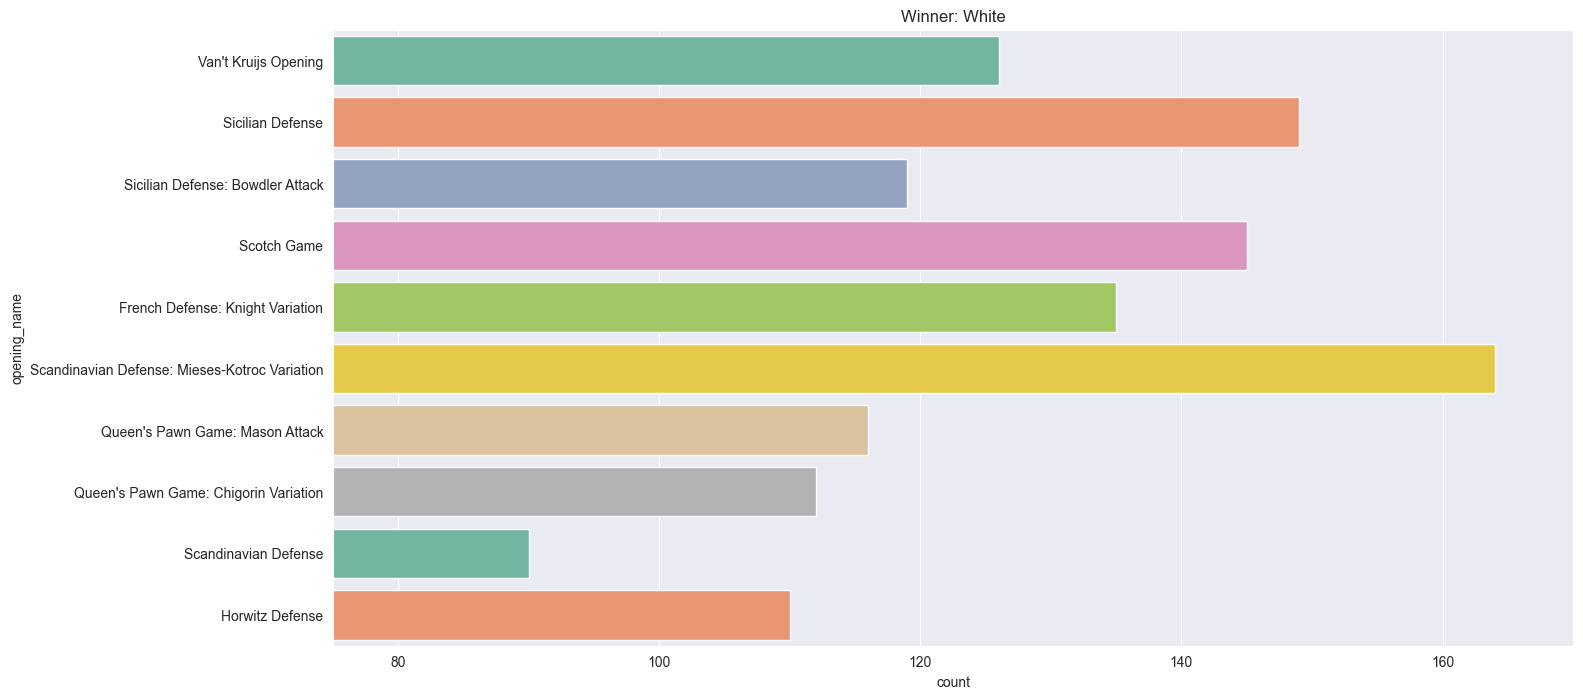

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visualization
plt.figure(figsize=(16, 8))

# Filter the dataframe to include only games where the winner is white
filtered_df = df[df.winner == 'white']

# Count the occurrences of each opening name and select the top 10 most frequent openings
# Then, create a countplot to visualize the frequency of each opening
plot = sns.countplot(y="opening_name",  # Plotting on the y-axis to avoid overcrowding of labels
                     data=filtered_df,  # Use the filtered dataframe
                     order=df['opening_name'].value_counts().iloc[:10].index,  # Order by the top 10 opening names
                     palette="Set2")  # Set color palette

# Set the title of the plot
plt.title('Winner: White')

# Adjust the x-axis limits for better visualization
plt.xlim(75, 170)

# Display the plot
plt.show()


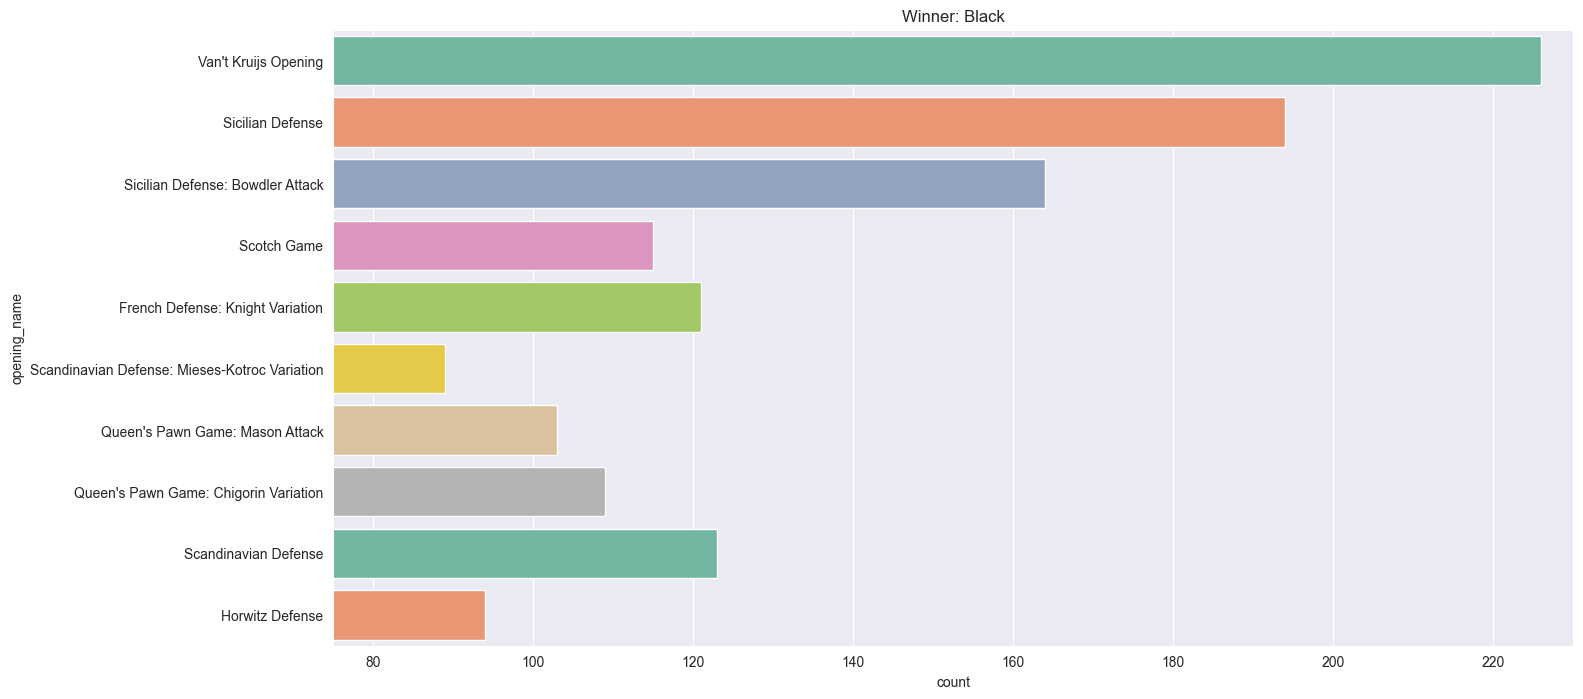

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visualization
plt.figure(figsize=(16, 8))

# Filter the dataframe to include only games where the winner is black
filtered_df = df[df.winner == 'black']

# Count the occurrences of each opening name and select the top 10 most frequent openings
# Then, create a countplot to visualize the frequency of each opening
plot = sns.countplot(y="opening_name",  # Plotting on the y-axis to avoid overcrowding of labels
                     data=filtered_df,  # Use the filtered dataframe
                     order=df['opening_name'].value_counts().iloc[:10].index,  # Order by the top 10 opening names
                     palette="Set2")  # Set color palette

# Set the title of the plot
plt.title('Winner: Black')

# Adjust the x-axis limits for better visualization
plt.xlim(75, 230)

# Display the plot
plt.show()


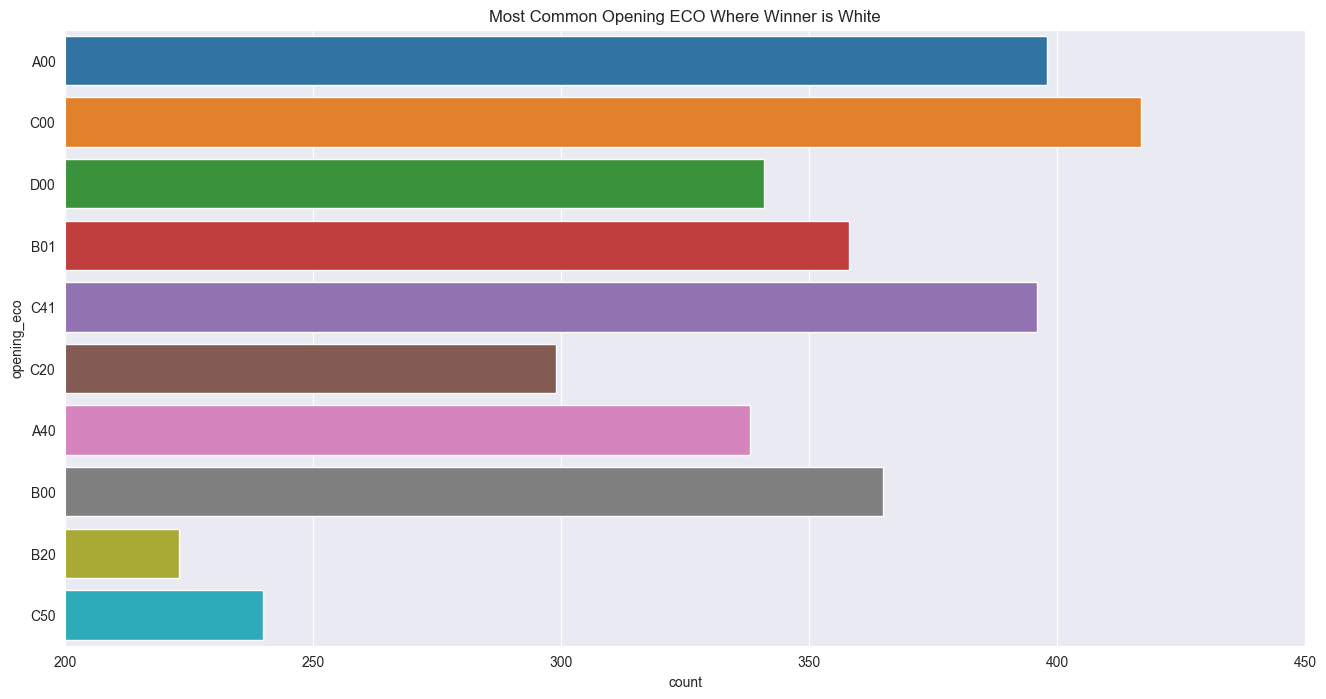

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visualization
plt.figure(figsize=(16, 8))

# Set the Seaborn style to 'darkgrid' for better aesthetics
sns.set_style('darkgrid')

# Filter the dataframe to include only games where the winner is white
filtered_df = df[df.winner == 'white']

# Count the occurrences of each opening ECO code and select the top 10 most frequent ECO codes
# Then, create a countplot to visualize the frequency of each ECO code
plot = sns.countplot(y="opening_eco",  # Plotting on the y-axis to avoid overcrowding of labels
                     data=filtered_df,  # Use the filtered dataframe
                     order=df['opening_eco'].value_counts().iloc[:10].index)  # Order by the top 10 ECO codes

# Adjust the x-axis limits for better visualization
plt.xlim(200, 450)

# Set the title of the plot
plt.title('Most Common Opening ECO Where Winner is White')

# Display the plot
plt.show()


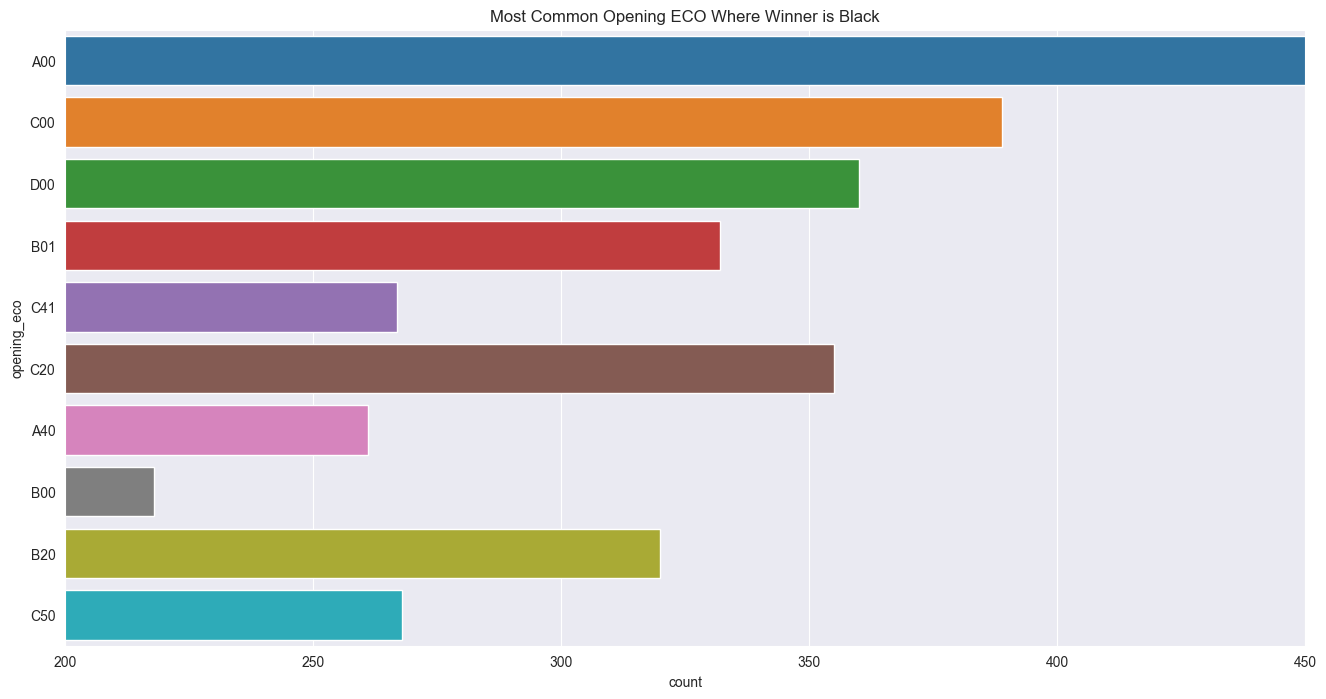

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visualization
plt.figure(figsize=(16, 8))

# Set the Seaborn style to 'darkgrid' for better aesthetics
sns.set_style('darkgrid')

# Filter the dataframe to include only games where the winner is black
filtered_df = df[df.winner == 'black']

# Count the occurrences of each opening ECO code and select the top 10 most frequent ECO codes
# Then, create a countplot to visualize the frequency of each ECO code
plot = sns.countplot(y="opening_eco",  # Plotting on the y-axis to avoid overcrowding of labels
                     data=filtered_df,  # Use the filtered dataframe
                     order=df['opening_eco'].value_counts().iloc[:10].index)  # Order by the top 10 ECO codes

# Adjust the x-axis limits for better visualization
plt.xlim(200, 450)

# Set the title of the plot
plt.title('Most Common Opening ECO Where Winner is Black')

# Display the plot
plt.show()
